# Multiple method comparison on penguins_data

In [1]:
from synthesizers import Load
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


In [2]:
# Read penguins data
penguins_real = pd.read_csv("Data\penguins_size.csv")
penguins_real = penguins_real.dropna()

target = "species"

gen_methods = ["tvae", "bayesian_network", "privbayes", "adsgan", "ctgan"]

In [3]:
gen_count = penguins_real.shape[0]

state = Load(penguins_real).Synthesize(split_size=0.8, train_plugin=gen_methods, gen_count=gen_count, n_jobs=len(gen_methods), eval_target_col=target)

[2024-05-14T12:11:34.985547+0200][8220][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 70%|███████   | 700/1000 [01:42<00:43,  6.85it/s]
[2024-05-14T12:13:20.590392+0200][8220][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
[2024-05-14T12:13:22.568101+0200][8220][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
100%|██████████| 6/6 [00:00<00:00, 10.39it/s]
[2024-05-14T12:13:23.551470+0200][8220][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  7%|▋         | 749/10000 [01:03<13:08, 11.73it/s]
[2024-05-14T12:14:27.747235+0200][8220][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python3

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


In [4]:
state[0].eval

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.069772,0.008884,0.930228,0.008884
1,pca_eigval_diff,u,0.308408,NaN,0.691592,NaN
2,pca_eigvec_ang,u,0.083870,NaN,0.973303,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,2.298388,NaN,0.890553,NaN
5,mutual_inf_diff,u,1.268330,NaN,0.939603,NaN
6,ks_tvd_stat,u,0.152352,0.027537,0.847648,0.027537
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.030322,0.019628,0.969678,0.019628
9,avg_pMSE,u,0.014613,0.001077,0.941547,0.004308


In [5]:
res_df = pd.DataFrame({"Models": gen_methods})

pr_res, ut_res = [], []
for i in range(len(state)):
    pr_res.append(np.mean(state[i].eval[state[i].eval['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(state[i].eval[state[i].eval['dim'] == 'u']['n_val']))

res_df["Utility"] = ut_res
res_df["Privacy"] = pr_res

res_df

,Models,Utility,Privacy
0,tvae,0.721639,0.785652
1,bayesian_network,0.872705,0.679490
2,privbayes,0.684883,0.841327
3,adsgan,0.727327,0.749652
4,ctgan,0.664744,0.778814


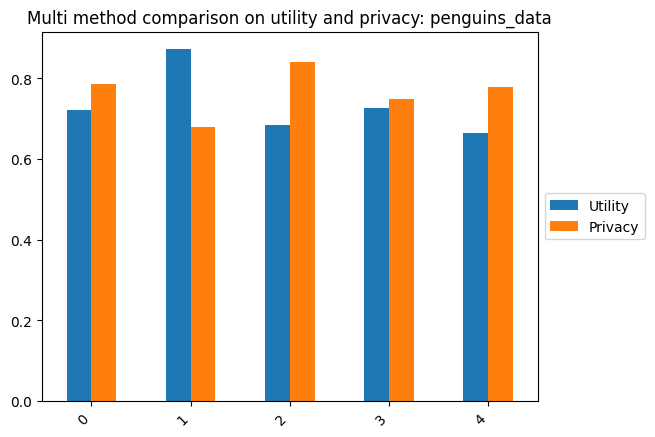

In [6]:
res_df.plot.bar()
plt.title("Multi method comparison on utility and privacy: penguins_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [7]:
results_f1 = pd.DataFrame(columns=["f1_diff"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    results_f1.loc[gen_methods[i]] = [eval.loc["cls_F1_diff", "val"]]
results_f1

,f1_diff
tvae,0.175087
bayesian_network,0.071174
privbayes,0.573690
adsgan,0.150017
ctgan,0.117715


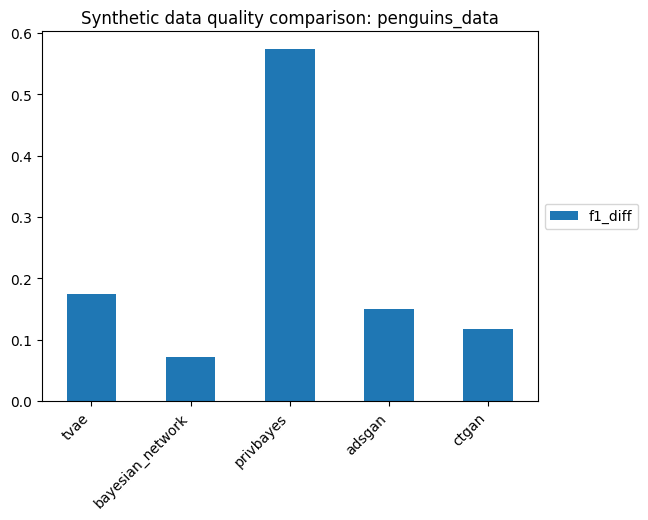

In [8]:
results_f1.plot.bar()
plt.title("Synthetic data quality comparison: penguins_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [9]:
privacy_results = pd.DataFrame(columns=["eps_identif_risk",
                                        "mia_cls_risk",
                                        "att_discl_risk"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    privacy_results.loc[gen_methods[i]] = [eval.loc["eps_identif_risk", "val"],
                                            eval.loc["mia_cls_risk", "val"],
                                            eval.loc["att_discl_risk", "val"]]
privacy_results

,eps_identif_risk,mia_cls_risk,att_discl_risk
tvae,0.187266,0.805882,0.430282
bayesian_network,0.434457,0.988235,0.509837
privbayes,0.026217,0.770588,0.196322
adsgan,0.265918,0.894118,0.449957
ctgan,0.217228,0.805882,0.411463


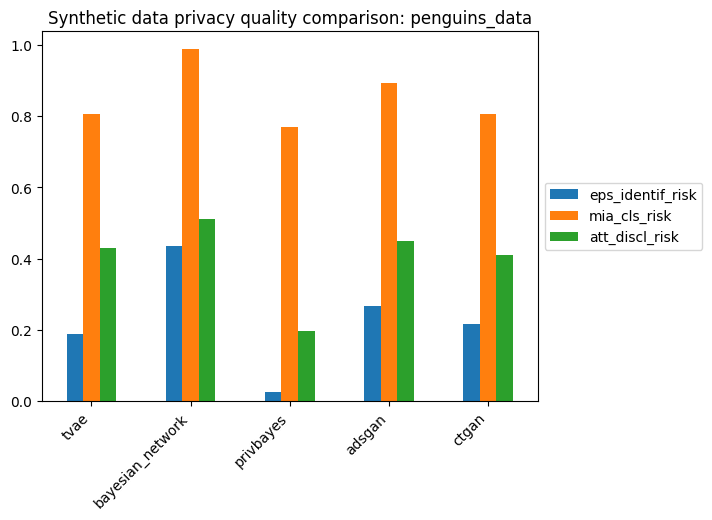

In [10]:
privacy_results.plot.bar()
plt.title("Synthetic data privacy quality comparison: penguins_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [11]:
utility_results = pd.DataFrame(columns=["avg_dwm_diff",
                                        "pca_eigval_diff",
                                        "pca_eigvec_ang"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    utility_results.loc[gen_methods[i]] = [eval.loc["avg_dwm_diff", "val"],
                                            eval.loc["pca_eigval_diff", "val"],
                                            eval.loc["pca_eigvec_ang", "val"]]
utility_results

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
tvae,0.069772,0.308408,0.083870
bayesian_network,0.013655,0.149589,0.167896
privbayes,0.016101,0.480320,0.656304
adsgan,0.048442,0.030715,0.065742
ctgan,0.115778,0.306886,0.332250


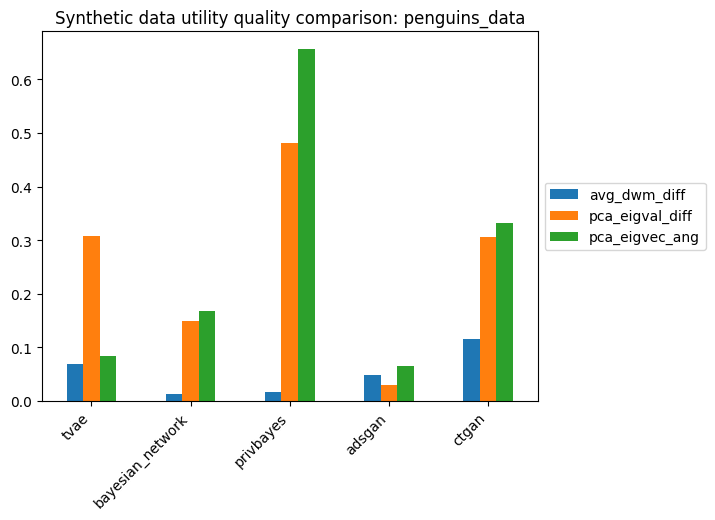

In [12]:
utility_results.plot.bar()
plt.title("Synthetic data utility quality comparison: penguins_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [13]:
matrix_results = pd.DataFrame(columns=["corr_mat_diff",
                                        "mutual_inf_diff"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    matrix_results.loc[gen_methods[i]] = [eval.loc["corr_mat_diff", "val"],
                                            eval.loc["mutual_inf_diff", "val"]]
matrix_results

,corr_mat_diff,mutual_inf_diff
tvae,2.298388,1.268330
bayesian_network,1.288346,1.193284
privbayes,3.057086,0.911115
adsgan,1.134506,1.198265
ctgan,1.944069,1.179094


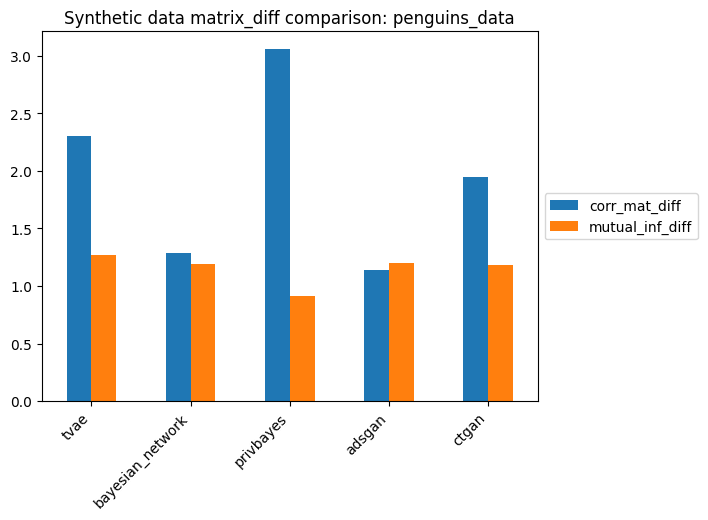

In [14]:
matrix_results.plot.bar()
plt.title("Synthetic data matrix_diff comparison: penguins_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()